In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
ac = pd.read_csv('datasets\\accident_data.csv')

In [3]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
ac.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
ac['District Area'] = ac['District Area'].fillna(ac['District Area'].mode()[0])

In [6]:
ac['Longitude'] = ac['Longitude'].fillna(ac['Longitude'].mode()[0])

In [7]:
ac['Urban_or_Rural_Area'] = ac['Urban_or_Rural_Area'].fillna(ac['Urban_or_Rural_Area'].mode()[0])

In [8]:
ac['Latitude'] = ac['Latitude'].fillna(ac['Latitude'].mode()[0])

In [9]:
ac['Weather_Conditions'] = ac['Weather_Conditions'].fillna('unaccounted')

In [10]:
ac.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [11]:
ac['Accident_Severity'] = ac['Accident_Severity'].astype('category')

In [12]:
ac['Accident Date'] = pd.to_datetime(ac['Accident Date'], dayfirst = True, errors = 'coerce')

In [13]:
ac.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [14]:
ac['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
19         7
16         7
18         6
22         5
21         4
29         3
40         2
28         2
24         2
27         2
42         2
25         1
32         1
68         1
45         1
62         1
47         1
48         1
26         1
43         1
Name: count, dtype: int64

In [15]:
ac['Accident Date'] = pd.to_datetime(ac['Accident Date'], errors='coerce')

In [16]:
ac['Year'] = ac['Accident Date'].dt.year

In [17]:
ac['Accident Date'] = pd.to_datetime(ac['Accident Date'], errors='coerce')

In [18]:
ac['Month'] = ac['Accident Date'].dt.month

<h1>Insight 1</h1>
<h2> Total accidents by severity </h2>

In [31]:
accidents_by_severity = ac.groupby('Accident_Severity').size()

In [32]:
accidents_by_severity

Accident_Severity
Fatal        8661
Serious     88217
Slight     563801
dtype: int64

<h1>Insight 2</h1>
<h2> Average casualties per year </h2>

In [98]:
avg_casualties = ac.groupby('Year')['Number_of_Casualties'].mean()

In [99]:
avg_casualties

Year
2019.0    1.358092
2020.0    1.349002
2021.0    1.351115
2022.0    1.349934
Name: Number_of_Casualties, dtype: float64

<h1>Insight 3</h1>
<h2> How many accident happen in the light condition "Day Light" in 2019 </h2>

In [33]:
ac_2019 = ac[ac['Year'] == 2019]

day_light_sum = ac_2019[(ac_2019["Light_Conditions"] == "daylight")].value_counts()

day_light_sum

Series([], Name: count, dtype: int64)

<h1>Insight 3</h1>
<h2> Number of accidents by vehicle type </h2>

In [34]:
accidents_by_vehicle_type = ac.groupby('Vehicle_Type').size()
accidents_by_vehicle_type

Vehicle_Type
Agricultural vehicle                       1947
Bus or coach (17 or more pass seats)      25878
Car                                      497992
Data missing or out of range                  6
Goods 7.5 tonnes mgw and over             17307
Goods over 3.5t. and under 7.5t            6096
Minibus (8 - 16 passenger seats)           1976
Motorcycle 125cc and under                15269
Motorcycle 50cc and under                  7603
Motorcycle over 125cc and up to 500cc      7656
Motorcycle over 500cc                     25657
Other vehicle                              5637
Pedal cycle                                 197
Ridden horse                                  4
Taxi/Private hire car                     13294
Van / Goods 3.5 tonnes mgw or under       34160
dtype: int64

<h1>Insight 4</h1>
<h2> Average number of casualties per vehicle type </h2>

In [44]:
accidents_per_month = ac['Month'].value_counts().sort_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

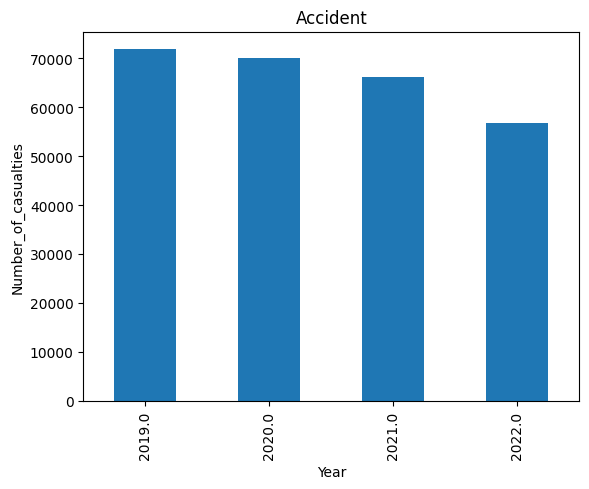

In [46]:
avg_casualties_by_vehicle = ac.groupby('Vehicle_Type')['Number_of_Casualties'].mean().to_frame()
avg_casualties_by_vehicle.unstack()
avg_casualties_by_vehicle


avg_casualties_per_year = ac['Year'].value_counts().sort_index()


avg_casualties_per_year.plot(kind='bar')
plt.title('Accident')
plt.xlabel('Year')
plt.ylabel('Number_of_casualties')
plt.show()

<h1>Insight 5</h1>
<h2> Road types with the most accidents </h2>

In [68]:
accidents_by_road_type = ac.groupby('Road_Type').size()
accidents_by_road_type

Road_Type
Dual carriageway       99424
One way street         13559
Roundabout             43992
Single carriageway    492143
Slip road               7041
dtype: int64

<h1>Insight 6</h1>
<h2> Urban vs rural accidents </h2>

In [69]:
accidents_by_area = ac.groupby('Urban_or_Rural_Area').size()
accidents_by_area

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421678
dtype: int64

<h1>Insight 7</h1>
<h2> How does the number of casualties vary between urban and rural areas during different months? </h2>

In [90]:
casualties_by_area_month = ac.groupby(['Urban_or_Rural_Area', 'Month'])['Number_of_Casualties'].mean()
casualties_by_area_month

Urban_or_Rural_Area  Month
Rural                1.0      1.449215
                     2.0      1.436782
                     3.0      1.439412
                     4.0      1.525697
                     5.0      1.480169
                     6.0      1.464091
                     7.0      1.461311
                     8.0      1.521781
                     9.0      1.469270
                     10.0     1.462834
                     11.0     1.461959
                     12.0     1.455143
Unallocated          5.0      2.000000
                     6.0      1.000000
                     7.0      1.000000
Urban                1.0      1.304129
                     2.0      1.274305
                     3.0      1.281721
                     4.0      1.300217
                     5.0      1.288494
                     6.0      1.273007
                     7.0      1.287726
                     8.0      1.301127
                     9.0      1.292286
                     10.0     1.27345

<h1>Insight 8</h1>
<h2> Average number of vehicles involved in accidents per year </h2>

In [71]:
avg_vehicles_per_year = ac.groupby('Year')['Number_of_Vehicles'].mean()
avg_vehicles_per_year

Year
2019.0    1.837784
2020.0    1.827145
2021.0    1.823475
2022.0    1.832004
Name: Number_of_Vehicles, dtype: float64

<h1>Insight 9</h1>
<h2> Average casualties in different weather conditions </h2>

In [72]:
avg_casualties_weather = ac.groupby('Weather_Conditions')['Number_of_Casualties'].mean()
avg_casualties_weather

Weather_Conditions
Fine + high winds        1.386018
Fine no high winds       1.350480
Fog or mist              1.452948
Other                    1.354869
Raining + high winds     1.416641
Raining no high winds    1.408214
Snowing + high winds     1.418079
Snowing no high winds    1.341776
unaccounted              1.233720
Name: Number_of_Casualties, dtype: float64

<h1>Insight 10</h1>
<h2> Most common district area for accidents </h2>

In [73]:
most_common_area = ac['District Area'].mode()[0]
most_common_area

'Birmingham'

<h1>Insight 11</h1>
<h2> How does accident severity vary across different districts? </h2>

In [74]:
accidents_by_district = ac.groupby('District Area')['Accident_Severity'].value_counts()
accidents_by_district

District Area  Accident_Severity
Aberdeen City  Slight               1072
               Serious               239
               Fatal                  12
Aberdeenshire  Slight               1401
               Serious               463
                                    ... 
Wyre Forest    Serious               132
               Fatal                  22
York           Slight               1621
               Serious               255
               Fatal                  21
Name: count, Length: 1266, dtype: int64

<h1>Insight 12</h1>
<h2> How do weather conditions impact the number of vehicles involved in accidents? </h2>

In [75]:
avg_vehicles_by_weather = ac.groupby('Weather_Conditions')['Number_of_Vehicles'].mean()
avg_vehicles_by_weather

Weather_Conditions
Fine + high winds        1.779401
Fine no high winds       1.836809
Fog or mist              1.807823
Other                    1.777668
Raining + high winds     1.777951
Raining no high winds    1.831610
Snowing + high winds     1.737853
Snowing no high winds    1.754889
unaccounted              1.802661
Name: Number_of_Vehicles, dtype: float64

<h1>Insight 13</h1>
<h2>  Which vehicle types are most frequently involved in accidents? </h2>

In [89]:
accidents_by_vehicle_type_count = ac.groupby('Vehicle_Type').size().idxmax()
accidents_by_vehicle_type_count

'Car'

<h1>Insight 14</h1>
<h2> How do accident casualties change based on the number of vehicles involved? </h2>


In [77]:
avg_casualties_by_vehicle_count = ac.groupby('Number_of_Vehicles')['Number_of_Casualties'].mean()
avg_casualties_by_vehicle_count

Number_of_Vehicles
1      1.170932
2      1.374880
3      1.711169
4      1.995575
5      2.315341
6      2.612137
7      3.064189
8      3.401361
9      3.350877
10     3.629630
11     4.000000
12     2.285714
13     7.833333
14     5.444444
15     5.000000
16     6.000000
19    13.000000
28    16.000000
32     5.000000
Name: Number_of_Casualties, dtype: float64

<h1>Insight 15</h1>
<h2> What is the average number of casualties for each district area? </h2>

In [78]:
avg_casualties_by_district = ac.groupby('District Area')['Number_of_Casualties'].mean()
avg_casualties_by_district

District Area
Aberdeen City    1.139834
Aberdeenshire    1.310363
Adur             1.319871
Allerdale        1.474291
Alnwick          1.512931
                   ...   
Wychavon         1.427627
Wycombe          1.412377
Wyre             1.378029
Wyre Forest      1.382869
York             1.293094
Name: Number_of_Casualties, Length: 422, dtype: float64

In [ ]:
The numbe of average is 1.3

<h1>Insight 16</h1>
<h2> What is the trend of accidents by month across multiple years? </h2>

In [94]:
accidents_by_month_year = ac.groupby(['Year', 'Month']).size().unstack().sum()
accidents_by_month_year

Month
1.0     18252
2.0     22264
3.0     21824
4.0     19787
5.0     21723
6.0     22196
7.0     22939
8.0     21106
9.0     22558
10.0    23962
11.0    24240
12.0    24156
dtype: int64

<h1>Insight 17</h1>
<h2>  How many accidents involve more than one vehicle? </h2>

In [80]:
accidents_multiple_vehicles = ac[ac['Number_of_Vehicles'] > 1].shape[0]
accidents_multiple_vehicles

459892

<h1>Insight 18</h1>
<h2>  What is the relationship between weather conditions and accident severity? </h2>

In [81]:
weather_severity_relation = ac.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack().sum()
weather_severity_relation

Accident_Severity
Fatal        8661
Serious     88217
Slight     563801
dtype: int64

<h1>Insight 19</h1>
<h2> What is the average number of casualties for accidents involving motorcycles? </h2>

In [82]:
avg_casualties_motorcycles = ac[ac['Vehicle_Type'] == 'Motorcycle']['Number_of_Casualties'].mean()
avg_casualties_motorcycles

nan

<h1>Insight 20</h1>
<h2> Correlation between number of vehicles and number of casualties </h2>

In [91]:
vehicle_casualty_corr = ac[['Number_of_Vehicles', 'Number_of_Casualties']].corr().iloc[0, 1]
vehicle_casualty_corr

np.float64(0.22888886126926722)

<h1>Insight 21</h1>
<h2> What year is the highest number of casualties </h2>

In [101]:
avg_casualties = ac.groupby('Year')['Number_of_Casualties'].sum()
avg_casualties

Year
2019.0    97602
2020.0    94650
2021.0    89406
2022.0    76683
Name: Number_of_Casualties, dtype: int64

<h1>Insight 22</h1>
<h2> What year is the highest number of Accident </h2>

In [112]:
avg_casualties = ac.groupby('Year')['Accident Date'].value_counts()
avg_casualties

Year    Accident Date
2019.0  2019-12-06       678
        2019-02-01       676
        2019-10-05       657
        2019-12-12       655
        2019-12-11       653
                        ... 
2022.0  2022-01-09       236
        2022-12-02       236
        2022-04-05       231
        2022-02-07       213
        2022-01-10       123
Name: count, Length: 576, dtype: int64

<h1>Insight 23</h1>
<h2> What is the most common accident severity in urban vs rural areas? </h2>

In [114]:
most_comm_severity_area = ac.groupby("Urban_or_Rural_Area")["Accident_Severity"].agg(lambda x: x.mode()[0])
most_comm_severity_area

Urban_or_Rural_Area
Rural          Slight
Unallocated    Slight
Urban          Slight
Name: Accident_Severity, dtype: category
Categories (3, object): ['Fatal', 'Serious', 'Slight']